In [114]:
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras as keras

In [127]:
m,b = 3.0,-1

L,R = -500, 500
X = np.random.random(size= 300)*(R-L+1) + L

def f(x, delta):
    return x*m + b + np.random.random()*(2*delta+1) - delta

y = np.vectorize(f)(X,delta= 20)

# X_noise = len(X)*np.random.random_sample(size= 50) + X.min()

X_noise = np.random.choice(X, size= 100)
y_noise = np.vectorize(f)(X_noise, delta= 100)

Text(0.5, 1.0, 'Data Distribution')

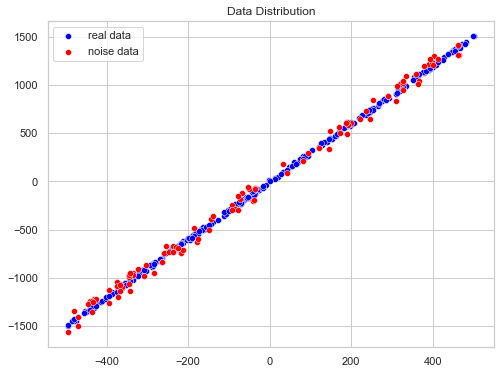

In [129]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.scatterplot(x=X, y=y, color='blue', label='real data')
sns.scatterplot(x=X_noise, y=y_noise, color='red', label='noise data')
plt.title('Data Distribution')

In [156]:
model = keras.Sequential([
    keras.layers.Dense(input_shape=[1], units=1)
])

In [157]:

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse','mae'],
)

In [163]:
history = model.fit(np.concatenate((X,X_noise)),
                    np.concatenate((y,y_noise)),
                    epochs= 2000,
                    batch_size= 32,
                    verbose= True
                    )

13/13 [==============================] - 0s 3ms/step - loss: 21893.3008 - mse: 21893.3008 - mae: 129.2557
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 21436.5469 - mse: 21436.5469 - mae: 127.8777
Epoch 403/1000
13/13 [==============================] - 0s 8ms/step - loss: 20998.0547 - mse: 20998.0547 - mae: 126.5242
Epoch 404/1000
13/13 [==============================] - 0s 4ms/step - loss: 20550.1719 - mse: 20550.1719 - mae: 125.1274
Epoch 405/1000
13/13 [==============================] - 0s 5ms/step - loss: 20116.1914 - mse: 20116.1914 - mae: 123.7568
Epoch 406/1000
13/13 [==============================] - 0s 5ms/step - loss: 19693.9062 - mse: 19693.9062 - mae: 122.4089
Epoch 407/1000
13/13 [==============================] - 0s 5ms/step - loss: 19271.5352 - mse: 19271.5352 - mae: 121.0619
Epoch 408/1000
13/13 [==============================] - 0s 6ms/step - loss: 18867.7246 - mse: 18867.7246 - mae: 119.7473
Epoch 409/1000
13/13 [=========================

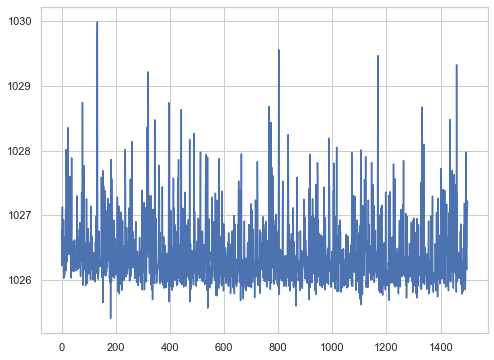

In [165]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'][500:])

In [186]:
pred = model.predict(np.concatenate((X,X_noise))).reshape((400,))

13/13 [==============================] - 0s 2ms/step


<AxesSubplot:>

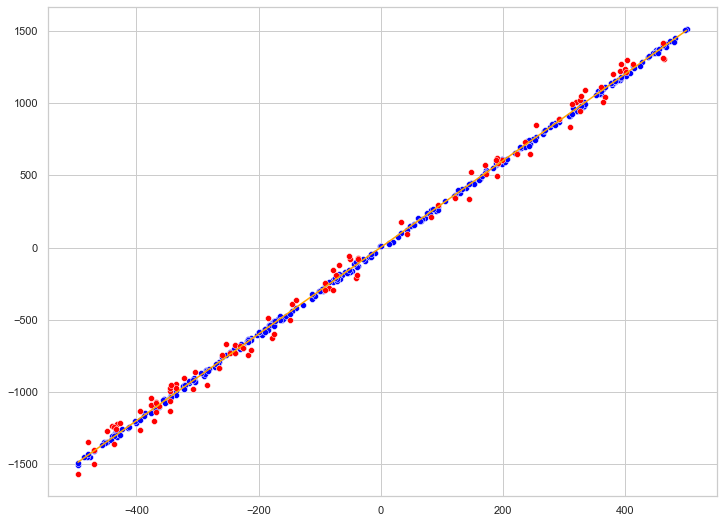

In [187]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X, y=y, color='blue')
sns.scatterplot(x=X_noise, y= y_noise, color='red')
sns.lineplot(
    x= np.concatenate((X,X_noise)),
    y= pred,
    color= 'orange'
)

In [188]:
model.weights   

[<tf.Variable 'dense_7/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.999859]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([1.1128094], dtype=float32)>]